### Statistical Testing
1. Since population and gdp have a natural trend of increasing over years, we need to conduct statistical analysis to determine whether legalization of weed has affected that trend.
2. Since we assume the homogeinity of variance in our pre- and post legalization population samples, we can perform a z-test.
3. Our null-hypothesis assumes that the true mean difference between the paired samples is zero which means any difference between pre- and post metrics is due to random variation.
4. Our alternative hypothesis assumes that the true mean difference between the paired samples is not equal to zero and is might be due to herb leaglization.

In [514]:
#Importing dependencies 

import os
import sqlite3
import re
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from scipy import stats
from math import sqrt
import statsmodels.api as sm
from scipy.stats.distributions import norm

plt.style.use('ggplot')
%matplotlib inline

## Comparison of population changes across states that have legalized marijuana

In [ ]:
legalization = [{"state" : "Alaska", "year": 2014}, {"state" : "California", "year": 2016},
                {"state":"Colorado", "year" : 2012}, {"state": "Maine", "year" : 2016}, 
                {"state":"Massachusetts", "year":2016}, {"state":"Nevada", "year":2016}, 
                {"state":"Oregon", "year": 2014}, {"state" : "Vermont", "year": 2018}, 
                {"state" :"Washington", "year":2012}, {"state":"Washington D.C.","year": 2015}]


In [593]:
#Reading data into pandas

weed_df = pd.read_excel("/Users/daryarudych/Desktop/repos/Project2_Group1/db/weed_df.xlsx")

state_gdp = pd.read_excel("/Users/daryarudych/Desktop/repos/Project2_Group1/state_gdp.xlsx")


### Exploring population data 

#### Let's confirm our assumption that population tends to increase over years by plotting correlation heatmap

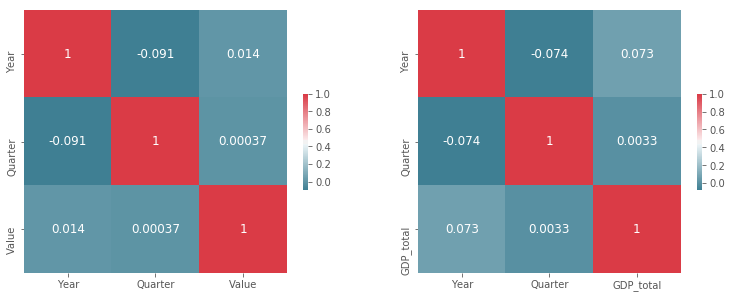

In [587]:
# Let's see if there's correlation between year and population

# Here we create a figure instance, and two subplots
fig = plt.figure(figsize = (20,20)) # width x height
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(data=weed_df.corr(), ax=ax1, cmap = cmap, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=state_gdp.corr(), ax=ax2, cmap = cmap, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})


#### The heatmap shows that year and value are linearly correlated, therefore we can use linear regression to determine average rate of change in population

In [505]:
#Getting pre and post legalization data for all states that have legalized cannabis
legalization = [{"state" : "Alaska", "year": 2014}, {"state" : "California", "year": 2016},
                {"state":"Colorado", "year" : 2012}, {"state": "Maine", "year" : 2016}, 
                {"state":"Massachusetts", "year":2016}, {"state":"Nevada", "year":2016}, 
                {"state":"Oregon", "year": 2014}, {"state" : "Vermont", "year": 2018}, 
                {"state" :"Washington", "year":2012}, {"state": "Washington D.C.","year": 2015}]

pre_results = []
post_results = []

for li in legalization:
    pre_weed = weed_df.loc[(weed_df.index == str(li["state"])) & (weed_df["Year"] < li["year"]), "Value"]
    post_weed = weed_df.loc[(weed_df.index == str(li["state"])) & (weed_df["Year"] >= li["year"]),"Value"]
    pre_years = weed_df.loc[(weed_df.index == str(li["state"])) & (weed_df["Year"] < li["year"]), "Year"]
    post_years = weed_df.loc[(weed_df.index == str(li["state"])) & (weed_df["Year"] >= li["year"]), "Year"]
    pre_weed_dict = {"state" : li["state"], "pre_years": [pre_years], "pre_weed": [pre_weed]}
    post_weed_dict = {"state" : li["state"], "post_years": [post_years], "post_weed": [post_weed]}
    pre_results.append(pre_weed_dict.copy())
    post_results.append(post_weed_dict.copy())

### Plotting results for Alaska

Average rate of population change before cannabis: 4999.9
Average rate of population change after cannabis: -1140.86


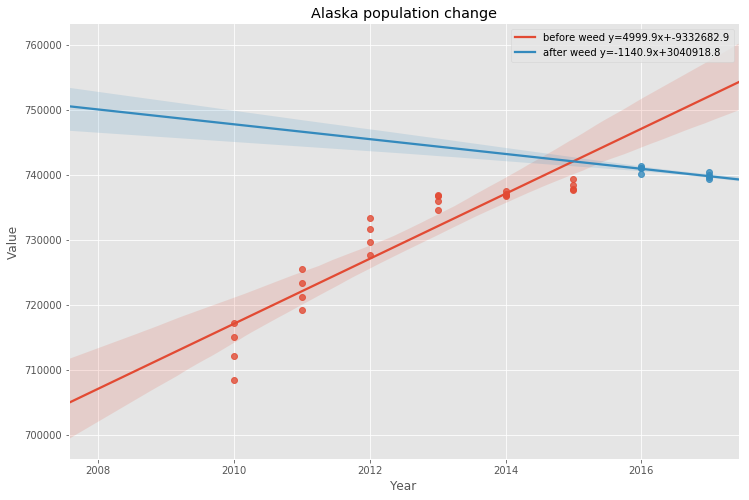

In [519]:

A_pre_weed_pop = weed_df.loc[(weed_df["State"] == "Alaska") & (weed_df["Year"] < 2016), ["Value", "Year"]]
A_post_weed_pop = weed_df.loc[(weed_df["State"] == "Alaska") & (weed_df["Year"] >= 2016), ["Value", "Year"]]

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(A_pre_weed_pop["Year"], A_pre_weed_pop["Value"])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(A_post_weed_pop["Year"], A_post_weed_pop["Value"])
line1 = sns.regplot("Year", "Value", A_pre_weed_pop, line_kws={'label':"before weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
line1.legend()
line1.figure.set_size_inches(12, 8)
sns.despine()
line2 = sns.regplot("Year", "Value", A_post_weed_pop, line_kws={'label': "after weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)})
line2.legend()
line2.set_title('Alaska population change')
plt.savefig("Alaska_pop_change.png")

print(f'Average rate of population change before cannabis: {round(slope1, 2)}')
print(f'Average rate of population change after cannabis: {round(slope2, 2)}')



In [564]:
md = slope1 - slope2
se = np.sqrt(np.var(A_pre_weed_pop["Value"])/len(A_pre_weed_pop["Value"]) + np.var(A_post_weed_pop["Value"])/len(A_post_weed_pop["Value"]))
lcl,ucl = md-2*se,md+2*se
z = md/se
pvalue = -2*norm.cdf(-np.abs(z))
print(f'p-value = {pvalue}')


p-value = -0.09614566240741433


### Plotting regressions for California

Average rate of population change before cannabis: 339586.52
Average rate of population change after cannabis: 212837.04


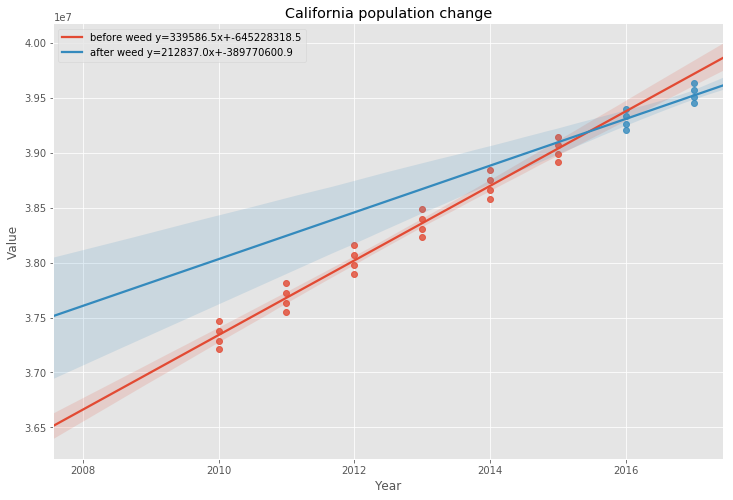

In [571]:

CA_pre_weed_pop = weed_df.loc[(weed_df["State"] == "California") & (weed_df["Year"] < 2016), ["Value", "Year"]]
CA_post_weed_pop = weed_df.loc[(weed_df["State"] == "California") & (weed_df["Year"] >= 2016), ["Value", "Year"]]

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(CA_pre_weed_pop["Year"], CA_pre_weed_pop["Value"])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(CA_post_weed_pop["Year"], CA_post_weed_pop["Value"])
line1 = sns.regplot("Year", "Value", CA_pre_weed_pop, line_kws={'label':"before weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
line1.legend()
line1.figure.set_size_inches(12, 8)
sns.despine()
line2 = sns.regplot("Year", "Value", CA_post_weed_pop, line_kws={'label': "after weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)})
line2.legend()
line2.set_title('California population change')
plt.savefig("California_pop_change.png")

print(f'Average rate of population change before cannabis: {round(slope1, 2)}')
print(f'Average rate of population change after cannabis: {round(slope2, 2)}')


In [572]:
md = slope1 - slope2
se = np.sqrt(np.var(CA_pre_weed_pop["Value"])/len(CA_pre_weed_pop["Value"]) + np.var(CA_post_weed_pop["Value"])/len(CA_post_weed_pop["Value"]))
lcl,ucl = md-2*se,md+2*se
z = md/se
pvalue = -2*norm.cdf(-np.abs(z))
print(f'p-value = {pvalue}')

p-value = -0.33634995226252695


Average rate of population change before cannabis: 342063.25
Average rate of population change after cannabis: 303697.71


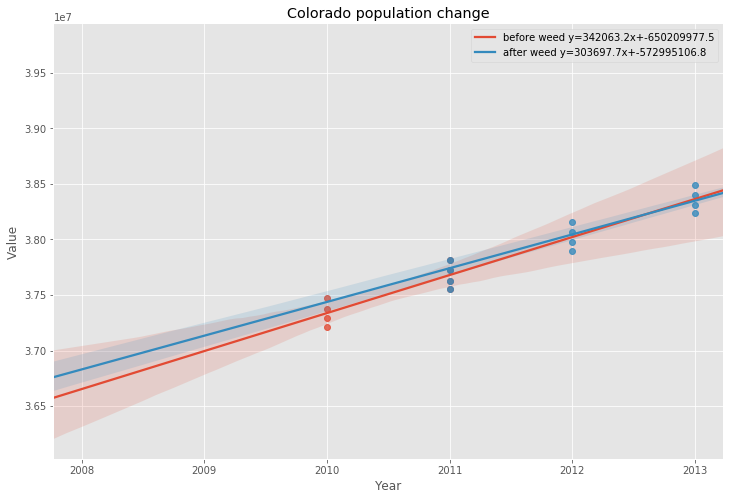

In [575]:
#Let's plot regression lines for Colorado before and after legalization
CO_pre_weed = weed_df.loc[(weed_df["State"] == "California") & (weed_df["Year"] < 2012), ["Value", "Year"]]
CO_post_weed = weed_df.loc[(weed_df["State"] == "California") & (weed_df["Year"] >= 2011), ["Value", "Year"]]

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(CO_pre_weed["Year"], CO_pre_weed["Value"])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(CO_post_weed["Year"], CO_post_weed["Value"])
line1 = sns.regplot("Year", "Value", CO_pre_weed, line_kws={'label':"before weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
line1.legend()
line1.figure.set_size_inches(12, 8)
sns.despine()
line2 = sns.regplot("Year", "Value", CO_post_weed, line_kws={'label': "after weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)})
line2.legend()
line2.set_title('Colorado population change')

print(f'Average rate of population change before cannabis: {round(slope1, 2)}')
print(f'Average rate of population change after cannabis: {round(slope2, 2)}')

In [576]:
md = slope1 - slope2
se = np.sqrt(np.var(CO_pre_weed["Value"])/len(CO_pre_weed["Value"]) + np.var(CO_post_weed["Value"])/len(CO_post_weed["Value"]))
lcl,ucl = md-2*se,md+2*se
z = md/se
pvalue = -2*norm.cdf(-np.abs(z))
print(f'p-value = {pvalue}')

p-value = -0.7848919473565716


#### Since our p-value < 0.05 we reject the null hypothesis and accept the alternative one. Therefore, we conclude that the change in the rate of population growth before and after legalization is statistically significant and might be due to the legalization of cannabis.

## Comparison of GDP changes

In [553]:
state_gdp = pd.read_excel("/Users/daryarudych/Desktop/repos/Project2_Group1/state_gdp.xlsx")
state_gdp.columns

Index(['State', 'Year', 'Quarter', 'GDP_total'], dtype='object')

In [555]:
A_pre_gdp = state_gdp.loc[(state_gdp["State"] == "Alaska") & (state_gdp["Year"] < 2014), ["Year", "GDP_total"]]
A_post_gdp = state_gdp.loc[(state_gdp["State"] == "Alaska") & (state_gdp["Year"] >= 2014), ["Year", "GDP_total"]]

Average rate of gdp change before cannabis: 1915.15
Average rate of gdp change after cannabis: -1276.64


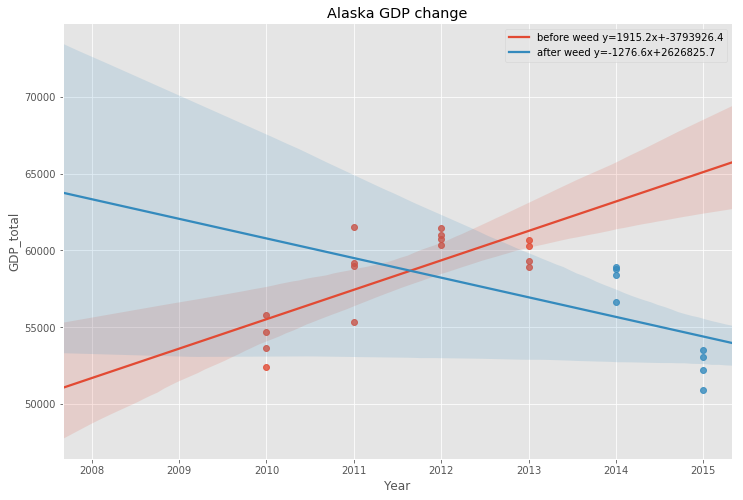

In [558]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(A_pre_gdp["Year"], A_pre_gdp["GDP_total"])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(A_post_gdp["Year"], A_post_gdp["GDP_total"])
line1 = sns.regplot("Year", "GDP_total", A_pre_gdp, line_kws={'label':"before weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
line1.legend()
line1.figure.set_size_inches(12, 8)
sns.despine()
line2 = sns.regplot("Year", "GDP_total", A_post_gdp, line_kws={'label': "after weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)})
line2.legend()
line2.set_title('Alaska GDP change')
plt.savefig("Alaska_gdp_change.png")

print(f'Average rate of gdp change before cannabis: {round(slope1, 2)}')
print(f'Average rate of gdp change after cannabis: {round(slope2, 2)}')


Average rate of gdp change before cannabis: 1915.15
Average rate of gdp change after cannabis: -1276.64


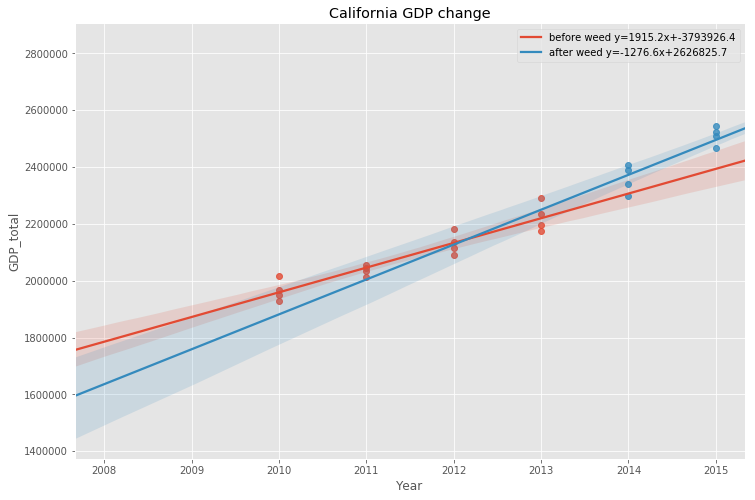

In [595]:
CA_pre_gdp = state_gdp.loc[(state_gdp["State"] == "California") & (state_gdp["Year"] < 2014), ["Year", "GDP_total"]]
CA_post_gdp = state_gdp.loc[(state_gdp["State"] == "California") & (state_gdp["Year"] >= 2014), ["Year", "GDP_total"]]

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(A_pre_gdp["Year"], A_pre_gdp["GDP_total"])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(A_post_gdp["Year"], A_post_gdp["GDP_total"])
line1 = sns.regplot("Year", "GDP_total", CA_pre_gdp, line_kws={'label':"before weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
line1.legend()
line1.figure.set_size_inches(12, 8)
sns.despine()
line2 = sns.regplot("Year", "GDP_total", CA_post_gdp, line_kws={'label': "after weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)})
line2.legend()
line2.set_title('California GDP change')
plt.savefig("California_gdp_change.png")

print(f'Average rate of gdp change before cannabis: {round(slope1, 2)}')
print(f'Average rate of gdp change after cannabis: {round(slope2, 2)}')



In [570]:
md = slope1 - slope2
se = np.sqrt(np.var(CA_pre_gdp["GDP_total"])/len(CA_pre_gdp["GDP_total"]) + np.var(CA_post_gdp["GDP_total"])/len(CA_post_gdp["GDP_total"]))
lcl,ucl = md-2*se,md+2*se
z = md/se
pvalue = -2*norm.cdf(-np.abs(z))
print(f'p-value = {pvalue}')

p-value = -0.9445094106565215


Average rate of gdp change before cannabis: 3728.01
Average rate of gdp change after cannabis: 7248.75


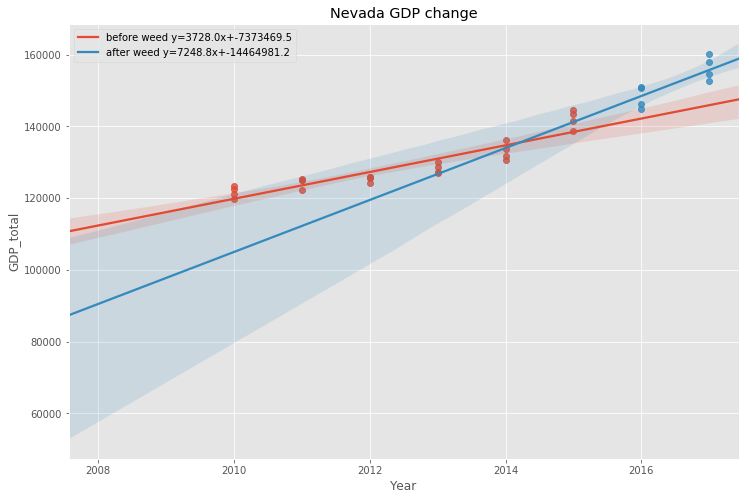

In [598]:
NE_pre_gdp = state_gdp.loc[(state_gdp["State"] == "Nevada") & (state_gdp["Year"] < 2016), ["Year", "GDP_total"]]
NE_post_gdp = state_gdp.loc[(state_gdp["State"] == "Nevada") & (state_gdp["Year"] >= 2016), ["Year", "GDP_total"]]

slopeNE, interceptNE, r_valueNE, p_valueNE, std_errNE = stats.linregress(NE_pre_gdp["Year"], NE_pre_gdp["GDP_total"])
slopeNE, interceptNE1, r_valueNE1, p_valueNE1, std_errNE1 = stats.linregress(NE_post_gdp["Year"], NE_post_gdp["GDP_total"])
line1 = sns.regplot("Year", "GDP_total", NE_pre_gdp, line_kws={'label':"before weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope1,intercept1)})
line1.legend()
line1.figure.set_size_inches(12, 8)
line2 = sns.regplot("Year", "GDP_total", NE_post_gdp, line_kws={'label': "after weed" + " "+"y={0:.1f}x+{1:.1f}".format(slope2,intercept2)})
line2.legend()
line2.set_title('Nevada GDP change')
plt.savefig("Nevada_gdp_change.png")

print(f'Average rate of gdp change before cannabis: {round(slope1, 2)}')
print(f'Average rate of gdp change after cannabis: {round(slope2, 2)}')


In [603]:
slopeNE, interceptNE, r_valueNE, p_valueNE, std_errNE = stats.linregress(NE_pre_gdp["Year"], NE_pre_gdp["GDP_total"])
slopeNE1, interceptNE1, r_valueNE1, p_valueNE1, std_errNE1 = stats.linregress(NE_post_gdp["Year"], NE_post_gdp["GDP_total"])

md = slopeNE1 - slopeNE
se = np.sqrt(np.var(NE_pre_gdp["GDP_total"])/len(NE_pre_gdp["GDP_total"]) + np.var(NE_post_gdp["GDP_total"])/len(NE_post_gdp["GDP_total"]))
lcl,ucl = md-2*se,md+2*se
z = md/se
pvalue = -2*norm.cdf(-np.abs(z))
print(f'p-value = {pvalue}')

p-value = -0.13079513625183153


In [604]:
conn = sqlite3.connect("/Users/daryarudych/Desktop/repos/Project2_Group1/db/marijuana.db")
cur = conn.cursor()
unemp_df = pd.read_sql_query("SELECT * from state_unemployment", conn)

In [609]:
state_unemp = pd.read_excel("/Users/daryarudych/Desktop/repos/Project2_Group1/state_uemp.xlsx")

In [611]:
state_unemp.columns


Index(['state ', 'year', 'unemployment (%)', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')